# Homework #2: Derivatives
|Author| Stanley A. Baronett|
|--|-------------------------------|
|Created | 6/11/2020|

In [2]:
diff_forward(f, x; h=sqrt(eps(Float64))) = (f(x+h) - f(x))/h
diff_central(f, x; h=cbrt(eps(Float64))) = (f(x+h/2) - f(x-h/2))/h
diff_complex(f, x; h=1e-20) = imag(f(x + h*im)) / h

diff_complex (generic function with 1 method)

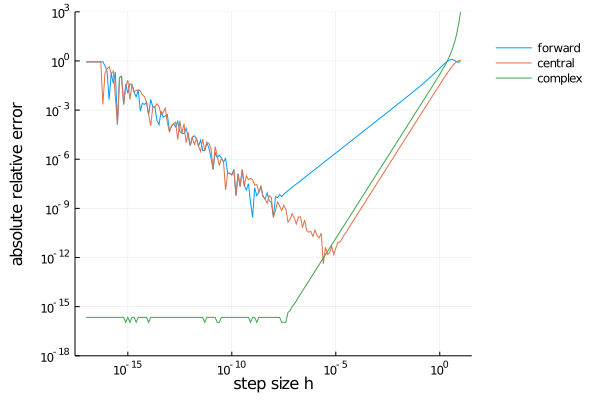

In [3]:
using Plots

f(x) = sin(x)
x = 1/2
y₀ = cos(x) # analytic derivative of f(x) at x=1/2
hs, ϵ₁, ϵ₂, ϵ₃ = [], [], [], []
exps = collect(-17:0.1:1)

for i in exps
    h = 10^i
    append!(hs, h)
    y₁ = diff_complex(f, x; h=h)
    ϵ = abs(y₀ - y₁)
    if ϵ == 0
        append!(ϵ₁, eps(Float64))
    else
        append!(ϵ₁, ϵ)
    end
    y₂ = diff_forward(f, x; h=h)
    append!(ϵ₂, abs(y₀ - y₂))
    y₃ = diff_central(f, x; h=h)
    append!(ϵ₃, abs(y₀ - y₃))
end

plot(hs, ϵ₂, label="forward")
plot!(hs, ϵ₃, label="central")
plot!(hs, ϵ₁, label="complex", legend=:outertopright,
    foreground_color_legend=nothing)
xaxis!("step size h", :log)
yaxis!("absolute relative error", (1e-18, 1e3), :log)